# 실습 과제

* 데이터셋 설명이 되어 있는 홈페이지입니다. https://www.kaggle.com/datasets/camnugent/california-housing-prices
* 유명한 데이터셋 중 하나이기에 구글링 하면 관련 자료, 코드, 설명 등을 확인할 수 있습니다. 이번 과제는 이 데이터셋을 활용해 전처리를 진행해보는 것입니다.
* 수업에서 배운 내용을 바탕으로 전처리를 진행해보세요. 아래에 비어져 있는 칸을 자유롭게 채우시면 됩니다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (21.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123105 files and dir

In [ ]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [ ]:
# 데이터 로드
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# 데이터 탐색
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# 결측치 확인 및 처리
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


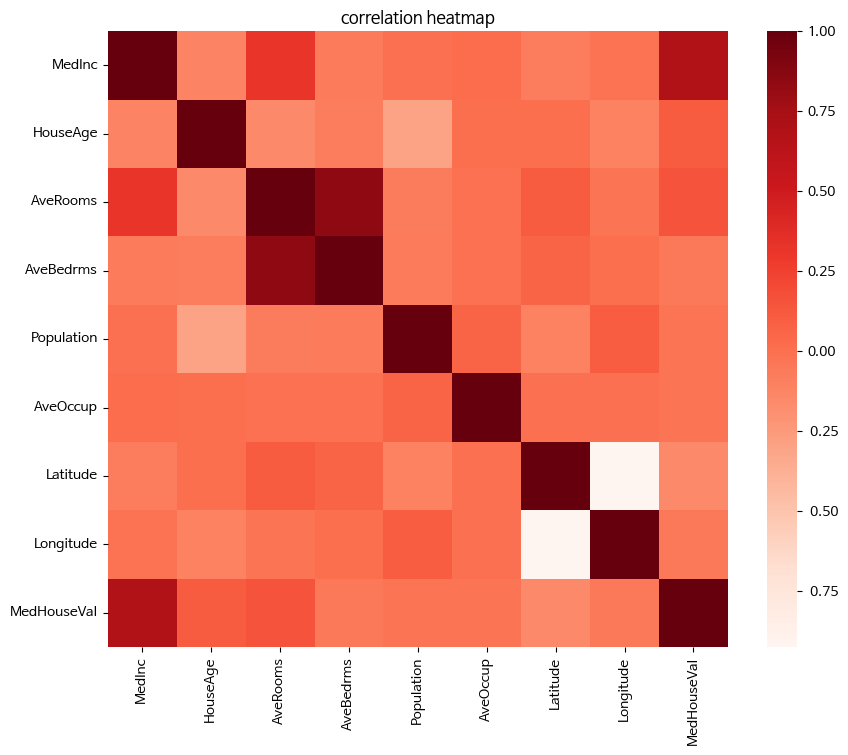

In [ ]:
# 이상치 탐지 (시각화, or scaler 사용)
#상관계수 시각화
#주택 가격은 Medlnc AveRooms,Houseage와 양의 상관관계를 가진다, AveBedrms,Population, AveOccup,Longitude와는 작은 상관관계를 지닌다
corr=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Reds')
plt.title("correlation heatmap")
plt.show()



In [ ]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight

  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight

  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

# 함수 사용해서 이상치 값 삭제
oulier_idx = get_outlier(df=df, column='A', weight=1.5)
df.drop(outlier_idx, axis=0, inplace=True)

KeyError: ignored

1. 칼럼별 분포 확인

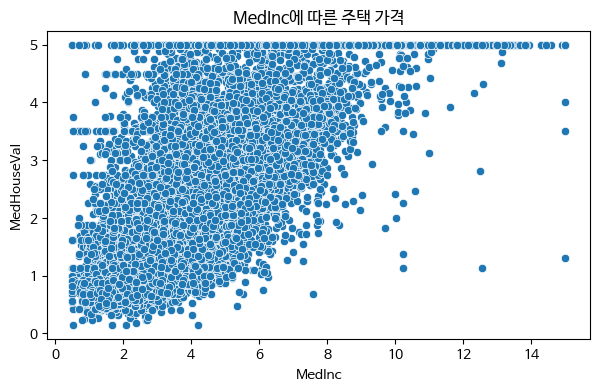

In [ ]:
#MedInc
plt.figure(figsize=(7,4))
plt.title("MedInc에 따른 주택 가격")
sns.scatterplot(x=df['MedInc'], y=df['MedHouseVal'])
plt.show()

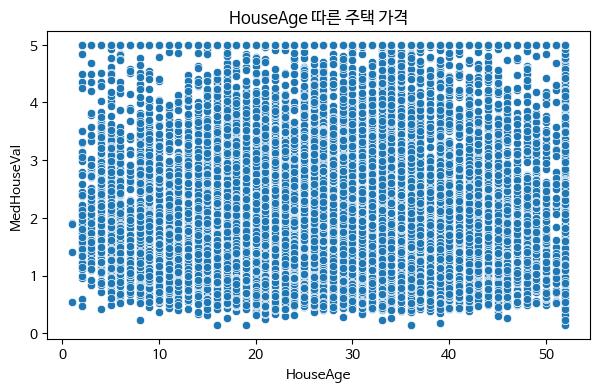

In [ ]:
#HouseAge
plt.figure(figsize=(7,4))
plt.title("HouseAge 따른 주택 가격")
sns.scatterplot(x=df['HouseAge'], y=df['MedHouseVal'])
plt.show()

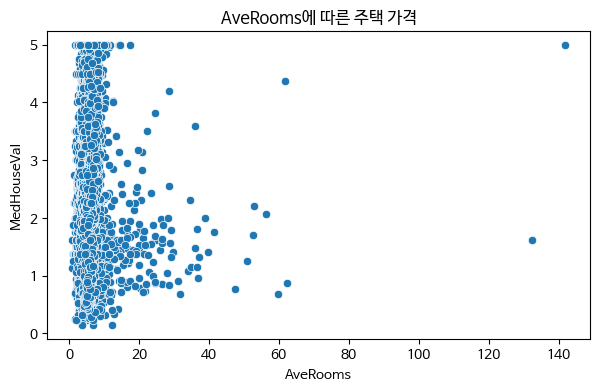

In [ ]:
#AveRooms
plt.figure(figsize=(7,4))
plt.title("AveRooms에 따른 주택 가격")
sns.scatterplot(x=df['AveRooms'], y=df['MedHouseVal'])
plt.show()

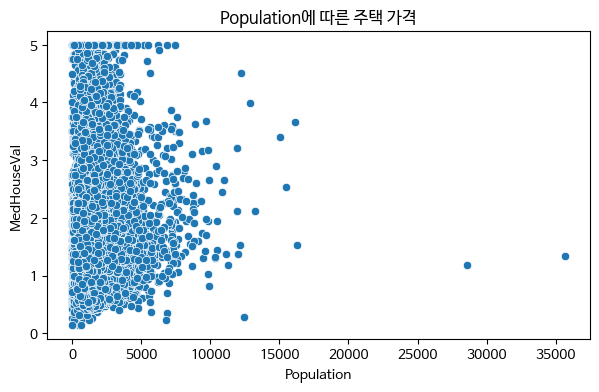

In [ ]:
#Population
plt.figure(figsize=(7,4))
plt.title("Population에 따른 주택 가격")
sns.scatterplot(x=df['Population'], y=df['MedHouseVal'])
plt.show()

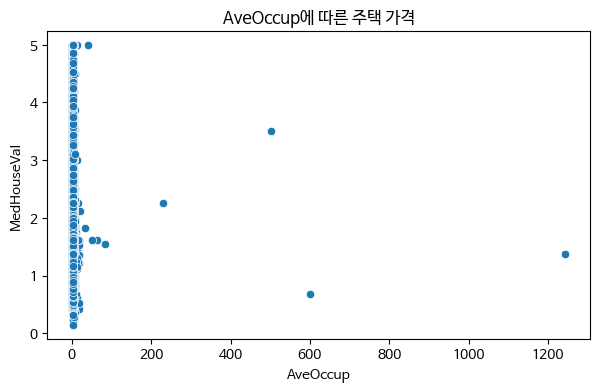

In [ ]:
#AveOccup
plt.figure(figsize=(7,4))
plt.title("AveOccup에 따른 주택 가격")
sns.scatterplot(x=df['AveOccup'], y=df['MedHouseVal'])
plt.show()

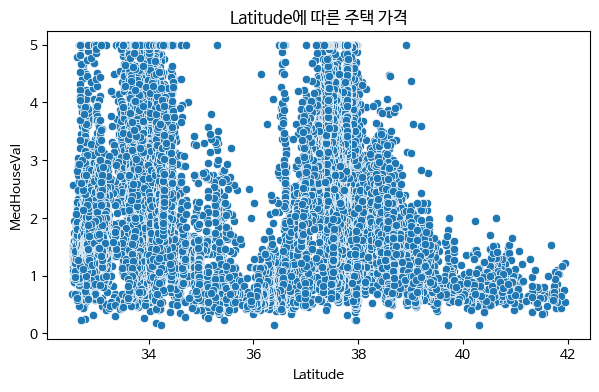

In [ ]:
#Latitude
plt.figure(figsize=(7,4))
plt.title("Latitude에 따른 주택 가격")
sns.scatterplot(x=df['Latitude'], y=df['MedHouseVal'])
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


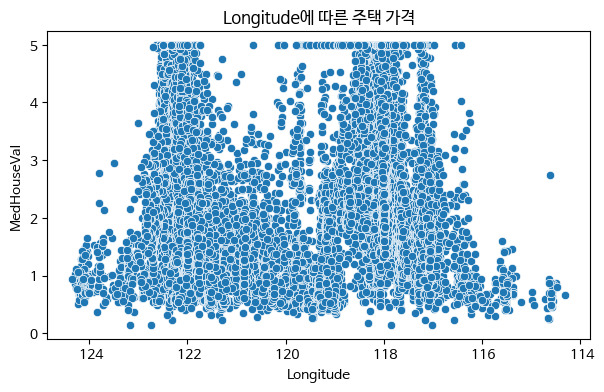

In [ ]:
#Longitude
plt.figure(figsize=(7,4))
plt.title("Longitude에 따른 주택 가격")
sns.scatterplot(x=df['Longitude'], y=df['MedHouseVal'])
plt.show()

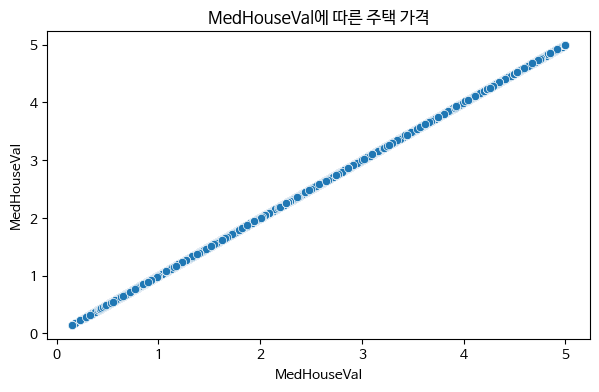

In [ ]:
#MedHouseVal
plt.figure(figsize=(7,4))
plt.title("MedHouseVal에 따른 주택 가격")
sns.scatterplot(x=df['MedHouseVal'], y=df['MedHouseVal'])
plt.show()

2. IQR로 각 칼럼별 이상치 제거 -> scatter plot으로는 확인된 이상치가 IQR을 활용한 방법에서는 제거가 되지 않아서 강의 시간에 배운 z-score을 활용

In [ ]:
import pandas as pd
import seaborn as sns

def remove_outliers(df):
    for column in df.columns:
        # sns.boxplot(x=df[column])
        # plt.title(f'Boxplot of {column}')
        # plt.show()

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[column] = df[column][(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df


In [ ]:
# 이상치 제거 전 df 길이
print(len(df))

# 이상치 제거 적용
df_cleaned = remove_outliers(df)

# 이상치 제거 후 df
print(len(df_cleaned))

20640
20640


3. Z-score를 활용한 이상치 제거

In [ ]:
# 데이터 로드
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df))
    df_cleaned = df[(z_scores < threshold).all(axis=1)]
    return df_cleaned

In [ ]:
# 이상치 제거 전 df 길이
print("이상치 제거 전: ",len(df))

# 이상치 제거 적용
df_cleaned = remove_outliers_zscore(df)

# 이상치 제거 후 df
print("이상치 제거 후: ",len(df_cleaned))

이상치 제거 전:  20640
이상치 제거 후:  19794


In [ ]:
# 데이터 정규화
import pandas as pd
from sklearn.preprocessing import StandardScaler

def zscore_normalize(df):
    scaler = StandardScaler()
    df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_normalized

In [ ]:
df_cleaned

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# Z-Score 정규화 적용
df_normalized = zscore_normalize(df_cleaned)
df_normalized

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.862381,0.966294,1.424948,-0.333600,-1.259520,-0.424668,1.049979,-1.320935,2.257376
1,2.847548,-0.640402,0.814260,-0.717241,1.301547,-0.928521,1.040621,-1.315944,1.407748
2,2.196891,1.849977,2.492445,0.033108,-1.045173,-0.145784,1.035941,-1.325926,1.349962
3,1.190802,1.849977,0.469794,0.030249,-0.968797,-0.433271,1.035941,-1.330916,1.252449
4,0.070911,1.849977,0.850047,0.089512,-0.960174,-0.847553,1.035941,-1.330916,1.260575
...,...,...,...,...,...,...,...,...,...
19789,-1.353742,-0.319062,-0.162102,0.475541,-0.615249,-0.418959,1.798671,-0.752010,-1.123982
19790,-0.732688,-0.881406,0.712667,1.823493,-1.217636,0.216575,1.803351,-0.811897,-1.133011
19791,-1.266676,-0.961741,-0.031049,0.377720,-0.415686,-0.684579,1.775275,-0.816888,-0.995770
19792,-1.162471,-0.881406,0.070436,0.760611,-0.743364,-0.913410,1.775275,-0.866793,-1.064391


### Tip: scaler 사용 방법
간단한 사용법은 아래와 같습니다. 필수사항은 아니기에 관심있으시면 공부해보시는 것을 추천드립니다.

In [ ]:
# 이를 위해 pip install scikit-learn 을 해야 할 수 있습니다.

# Z score Scaler 사용법
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(df_cleaned) # data에 scaling 하고 싶은 data(칼럼 형태로) 삽입

# Min-Max Scaler 사용법
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data2 = scaler.fit_transform(df_cleaned) # data에 scaling 하고 싶은 data(칼럼 형태로) 삽입

In [ ]:
df_cleaned

In [ ]:
scaled_df1 = pd.DataFrame(scaled_data1)
scaled_df1

In [ ]:
scaled_df2 = pd.DataFrame(scaled_data2)
scaled_df2